In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install xlrd

In [3]:
df = pd.read_excel(
    'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
     sheet_name = 'Canada by Citizenship',
     skiprows = range(20),
     skipfooter = 2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df.iloc[:, 9:43].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
2,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df.rename(columns = { 'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName' : 'Region'}, inplace = True)
df_canada = df.set_index('Country') #set index as one of the columns
df_canada['Total'] = df_canada.iloc[:, 8:42].sum(axis = 1)
df_canada.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis =1, inplace = True)
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
import matplotlib as npl
import matplotlib.pyplot as plt
%matplotlib inline

KeyError: "['Type' 'Coverage' 'AREA' 'REG' 'DEV'] not found in axis"

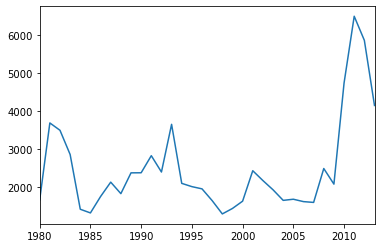

In [7]:
years = list(range(1980, 2014))
df_canada.loc['Haiti', years].plot(kind = 'line')
df_canada.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis =1, inplace = True)
plt.title('Immigrations from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()
df_canada.loc['Haiti', years].head()

In [8]:
df_canada.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [9]:
df_top5 = df_canada.head()
df_top5 = df_top5[years].transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


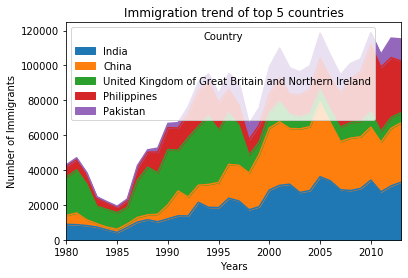

In [10]:
df_top5.plot(kind = 'area')
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

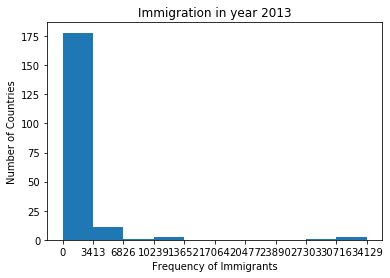

In [11]:
count, bin_edges = np.histogram(df_canada[2013])
df_canada[2013].plot(kind = 'hist', xticks = bin_edges)
plt.title('Immigration in year 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Frequency of Immigrants')

plt.show()

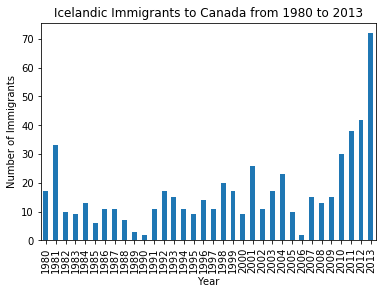

In [12]:
df_iceland = df_canada.loc['Iceland', years]
df_iceland.plot(kind = 'bar')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

plt.show()

In [13]:
df_continent = df_canada.groupby('Continent', axis = 0).sum()

In [14]:
df_continent

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


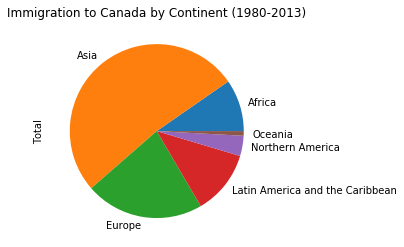

In [15]:
df_continent['Total'].plot(kind = 'pie')
plt.title('Immigration to Canada by Continent (1980-2013)')
plt.show()

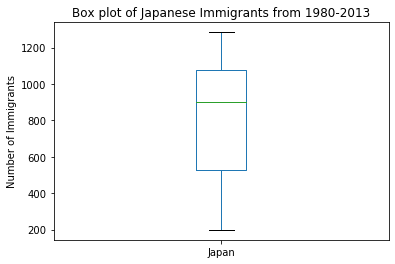

In [16]:
df_japan = df_canada.loc['Japan', years]
df_japan.plot(kind = 'box')
plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [17]:
df_canada

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2


In [27]:
df_total = pd.DataFrame(df_canada.iloc[:,3:42].sum(axis = 0))
df_total = df_total.reset_index()
df_total.drop(index = 34, axis = 0, inplace = True)
df_total.columns = ['Years', 'Total']
df_total['Years'] = df_total['Years'].astype('int64')
df_total

,Years,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


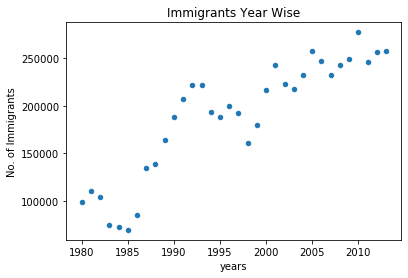

In [29]:
df_total.plot(kind = 'scatter', x = 'Years', y = 'Total')
plt.title('Immigrants Year Wise')
plt.xlabel('years')
plt.ylabel('No. of Immigrants')
plt.show()

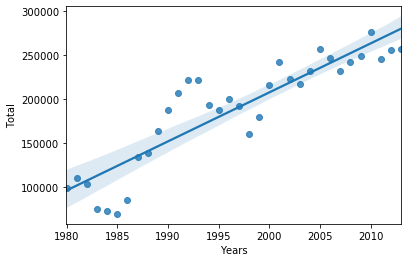

In [31]:
import seaborn as sns
ax = sns.regplot( x = 'Years', y = 'Total', data = df_total)

In [2]:
!pip install folium


In [6]:
import folium
world_map = folium.Map( 
    location = [56.130, -106.35], 
    zoom_start = 4, 
    titles = 'Mapbox Bright'
)
world_map

In [5]:
ontario = folium.map.FeatureGroup()
ontario.add_child(
    folium.CircleMarker(
    [51.25, -85.32], radius = 5,
     color = 'red', fill_color = 'Red'
     )
)

world_map.add_child(ontario)

folium.Marker([51.25, -85.32],
             popup = 'Ontario').add_to(world_map)

world_map